## Calculating and Analyzing CLV

### Importing standard packages:

In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.precision', 2)

## Joining original data with the churn and margin predicted values

In [3]:
import os
os.chdir("D:\Sunny_Personal\OSU MSBA\Fall 2019\BAN5561_CLV")
combined_df = pd.read_csv('combined_data.csv')
churn_df = pd.read_csv('churn_scores.csv')
margin_df = pd.read_csv('margin_scores.csv')

combined_df = pd.merge(combined_df, churn_df, on='acct_ID', how='left')
combined_df = pd.merge(combined_df, margin_df, on='acct_ID', how='left')

# it should be noted that Python is case sensitive for variable names.  acct_id above would fail.

combined_df.shape

(95400, 113)

## Since our margin model had transformed the target variable, we need to untransform the predicted value,
##     using the inverse of our transformation:

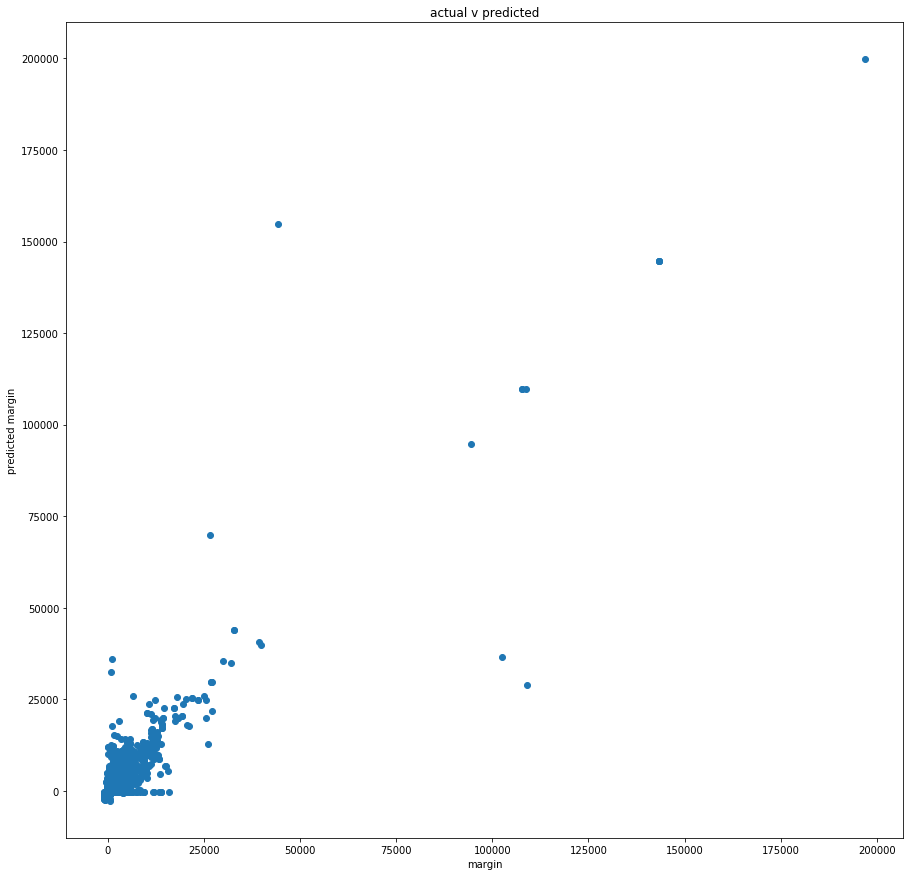

In [4]:
combined_df['P_margin_Y_pos_1']=10**combined_df['P_log_margin_Y_pos_1']-50000
# Plotting predicted untransformed values vs actual untransformed values:

plt.figure(figsize=(15,15))
plt.scatter(combined_df['P_margin_Y_pos_1'], combined_df['margin_Y_pos_1'])
plt.xlabel("margin")
plt.ylabel("predicted margin")
plt.title("actual v predicted")
# plt.xticks([])
# plt.yticks([])
print(" ") 
plt.show()

    1. It should be noted:  we are scoring our original data, used for modeling, only for the 
       purposes of analysis.
       
    2. In a "real world" situation, we would most likely be scoring a full population for which we 
        dont actually know the future churn or the future margin.

### We are using a simplified CLV formula

    *  are predicting only annual numbers,
    *  are assuming that next year's annual prediction are the same values for the next 3 years
    *  that our future value is adequately estimated using only 3 future years

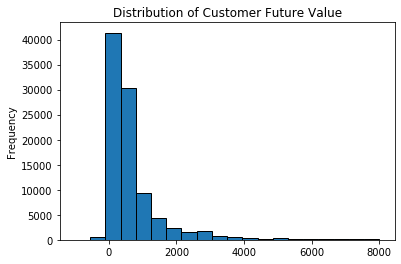

,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,churn_year_plus1_ind,log_order_cnt_36mo,log_purch_amt_36mo,log_purch_amt_life,log_purch_avg_36mo,log_purch_cnt_life,log_purch_cnt_tt_36mo,log_resp_cnt_36mo,perc_purch_cc_36mo,perc_purch_ck_36mo,perc_purch_et_36mo,margin_Y_neg_1,margin_Y_neg_2,margin_Y_neg_3,...,ST_TX,ST_UT,ST_VA,ST_VI,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,ST_missing,tier_1-Bronze,tier_2-Silver,tier_3-Gold,tier_4-Platinum,tier_5-Diamond,tier_prev_1-Bronze,tier_prev_2-Silver,tier_prev_3-Gold,tier_prev_4-Platinum,tier_prev_5-Diamond,tier_prev_xxx,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV
count,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,...,95400.00,9.54e+04,95400.00,9.54e+04,9.54e+04,95400.00,95400.00,9.54e+04,9.54e+04,9.54e+04,95400.00,95400.0,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,95400.00,9.54e+04,95400.00,9.54e+04,9.54e+04,95400.00,95400.00
mean,0.52,0.89,0.96,0.09,0.26,2.91,65.35,4.85,19.05,7.69,2.27,0.26,0.74,2.60,2.86,1.54,1.40,1.14,0.33,0.31,0.56,0.13,227.45,191.83,154.64,...,0.09,1.38e-03,0.04,2.52e-04,7.86e-04,0.03,0.01,8.43e-03,2.08e-03,4.05e-03,0.64,0.2,0.11,0.02,0.02,0.21,0.06,0.03,0.01,6.03e-03,0.68,2.64e-01,4.70e+00,416.27,817.41
std,0.50,0.31,0.19,0.29,0.44,3.10,58.05,9.95,14.87,44.69,2.35,0.44,0.29,0.65,0.79,0.35,0.60,0.43,0.45,0.44,0.47,0.32,1590.16,1606.82,1294.36,...,0.28,3.72e-02,0.20,1.59e-02,2.80e-02,0.16,0.11,9.14e-02,4.55e-02,6.35e-02,0.48,0.4,0.32,0.15,0.14,0.41,0.24,0.18,0.10,7.74e-02,0.47,3.18e-01,8.85e-03,1636.87,3412.71
min,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.00,0.00,0.00,0.00,0.00,-18624.22,-7675.16,-6902.63,...,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,3.53e-03,4.69e+00,-986.40,-2264.70
25%,0.00,1.00,1.00,0.00,0.00,1.00,14.00,1.00,6.00,0.00,1.00,0.00,0.60,2.21,2.34,1.32,0.95,0.85,0.00,0.00,0.00,0.00,43.25,0.00,0.00,...,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,0.00,1.50e-02,4.70e+00,157.59,113.61
50%,1.00,1.00,1.00,0.00,0.00,1.00,46.00,1.21,16.00,0.00,2.00,0.00,0.70,2.71,2.91,1.42,1.43,1.23,0.00,0.00,0.93,0.00,182.12,122.75,26.12,...,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,1.00,9.40e-02,4.70e+00,194.30,393.82
75%,1.00,1.00,1.00,0.00,1.00,4.00,109.00,2.56,33.00,3.00,3.00,1.00,0.90,3.02,3.43,1.68,1.87,1.53,0.60,0.93,1.00,0.00,336.24,293.66,243.54,...,0.00,0.00e+00,0.00,0.00e+00,0.00e+00,0.00,0.00,0.00e+00,0.00e+00,0.00e+00,1.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00e+00,1.00,5.13e-01,4.70e+00,401.56,783.00
max,1.00,1.00,1.00,1.00,1.00,12.00,298.00,165.00,428.00,2322.00,38.00,1.00,2.68,5.76,6.03,4.70,3.16,2.80,2.37,1.00,2.00,1.00,197543.65,203656.57,194459.00,...,1.00,1.00e+00,1.00,1.00e+00,1.00e+00,1.00,1.00,1.00e+00,1.00e+00,1.00e+00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00e+00,1.00,9.56e-01,5.39e+00,196934.68,318849.21


In [7]:
annual_discount_rate = 0.10
 
combined_df['CFV'] =(combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**1))/((1+annual_discount_rate)**1) + \
(combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**2))/((1+annual_discount_rate)**2) + \
(combined_df['P_margin_Y_pos_1']*((1-combined_df['P_churn_year_plus1_ind'])**3))/((1+annual_discount_rate)**3)
        
plothist = combined_df['CFV'].plot.hist(title="Distribution of Customer Future Value",bins=20, range=(-1000,8000),edgecolor='black')
plt.show()
combined_df.describe()

### Establishing the quadrants for high/low churn and margin

## Define the cutoffs for Margin & Retention Probabilities

In [8]:
print("median predicted churn: ",  np.median(combined_df['P_churn_year_plus1_ind']))
print("median predicted margin: %d" % (np.median(combined_df['P_margin_Y_pos_1'])))

# initializing to values which should not occur after logic below.
combined_df['retention_grp'] = '0X'
combined_df['margin_grp'] = '0X'
combined_df['quadrant_retention_margin'] = 'error_error'

combined_df.loc[combined_df['P_churn_year_plus1_ind']<np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="2H"
combined_df.loc[combined_df['P_churn_year_plus1_ind']>=np.median(combined_df['P_churn_year_plus1_ind']),'retention_grp']="1L"
combined_df.loc[(combined_df['P_margin_Y_pos_1']<np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="1L"
combined_df.loc[(combined_df['P_margin_Y_pos_1']>=np.median(combined_df['P_margin_Y_pos_1'])),'margin_grp']="2H"

combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "1L_1L"
combined_df.loc[(combined_df['retention_grp'] == '1L') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "1L_2H"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '1L'),'quadrant_retention_margin'] = "2H_1L"
combined_df.loc[(combined_df['retention_grp'] == '2H') & (combined_df['margin_grp'] == '2H'),'quadrant_retention_margin'] = "2H_2H"

combined_df.head(10)

median predicted churn:  0.09395141289081832
median predicted margin: 194


,ST,Zip,DMA,Area_Cd,emailable,solicit_ph_ind,solicit_email_ind,fixd_incm_flg,scheduled_purchase_flg,months_since_last_trans,months_since_first_trans,purch_avg_interval,mail_cnt_36mo,call_in_mo_36mo,call_out_mo_36mo,tier,tier_prev,acct_ID,activation_date,event_date,churn_year_plus1_ind,log_order_cnt_36mo,log_purch_amt_36mo,log_purch_amt_life,log_purch_avg_36mo,...,ST_VI,ST_VT,ST_WA,ST_WI,ST_WV,ST_WY,ST_missing,tier_1-Bronze,tier_2-Silver,tier_3-Gold,tier_4-Platinum,tier_5-Diamond,tier_prev_1-Bronze,tier_prev_2-Silver,tier_prev_3-Gold,tier_prev_4-Platinum,tier_prev_5-Diamond,tier_prev_xxx,P_churn_year_plus1_ind,P_log_margin_Y_pos_1,P_margin_Y_pos_1,CFV,retention_grp,margin_grp,quadrant_retention_margin
0,VA,23464,544,missing,0,0,1,0,0,2,128,2.93,4,0,0,3-Gold,xxx,B102465045,04JAN04,30JUN15,1,0.30,4.16,4.42,2.54,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.17,4.76,7703.39,13652.89,1L,2H,1L_2H
1,VA,23464,544,missing,0,0,1,0,0,2,128,2.93,4,0,0,3-Gold,xxx,B102465045,04JAN04,30JUN15,1,0.30,4.16,4.42,2.54,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0.17,4.76,7703.39,13652.89,1L,2H,1L_2H
2,NC,27542,560,919,1,1,1,0,0,4,122,2.11,22,4,0,5-Diamond,3-Gold,B106897643,04JUL04,NaN,0,0.95,3.50,4.09,2.14,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0.25,4.70,577.87,853.10,1L,2H,1L_2H
3,NV,89109,839,702,0,0,1,0,0,8,96,88.00,1,0,0,1-Bronze,xxx,B111832829,03SEP06,NaN,0,0.30,2.48,3.03,2.48,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.59,4.70,295.67,164.65,1L,2H,1L_2H
4,OH,43050,535,614,0,1,1,0,0,1,108,1.02,36,0,0,1-Bronze,xxx,B112883062,03SEP05,NaN,0,0.85,2.85,3.33,1.32,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.09,4.70,194.30,406.09,2H,2H,2H_2H
5,OH,43050,535,614,0,1,1,0,0,1,108,1.02,36,0,0,1-Bronze,xxx,B112883062,03SEP05,NaN,0,0.85,2.85,3.33,1.32,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.09,4.70,194.30,406.09,2H,2H,2H_2H
6,HI,96789,744,808,1,1,1,0,0,4,105,1.53,19,4,0,4-Platinum,3-Gold,B113581008,03DEC05,NaN,0,0.85,3.93,4.30,2.65,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.26,4.72,2355.01,3386.76,1L,2H,1L_2H
7,HI,96789,744,808,1,1,1,0,0,4,105,1.53,19,4,0,4-Platinum,3-Gold,B113581008,03DEC05,NaN,0,0.85,3.93,4.30,2.65,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0.26,4.72,2355.01,3386.76,1L,2H,1L_2H
8,NC,28278,517,704,0,1,1,0,0,11,96,1.27,13,0,0,2-Silver,xxx,B118493825,03SEP06,30SEP14,1,0.48,2.85,3.53,1.74,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0.80,4.70,145.88,31.65,1L,1L,1L_1L
9,WV,24966,559,missing,1,0,1,0,0,8,86,1.95,24,0,0,1-Bronze,xxx,B124032921,04JUL07,NaN,0,0.70,2.97,3.13,1.61,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0.73,4.70,173.22,54.69,1L,1L,1L_1L


# Profiling 

In [10]:
print("Number of accounts in each quadrant")
print(combined_df.groupby(['margin_grp','retention_grp'])['acct_ID'].count())
print("                ")
print("############################################################################################")
print("               ")
print("Percentages of accounts with scheduled purchases in each quadrant")
combined_df.groupby(['margin_grp','retention_grp'])['scheduled_purchase_flg'].mean()

Number of accounts in each quadrant
margin_grp  retention_grp
1L          1L               33672
            2H               10460
2H          1L               14028
            2H               37240
Name: acct_ID, dtype: int64
                
############################################################################################
               
Percentages of accounts with scheduled purchases in each quadrant


margin_grp  retention_grp
1L          1L               1.14e-02
            2H               6.40e-01
2H          1L               7.41e-03
            2H               4.85e-01
Name: scheduled_purchase_flg, dtype: float64

### Output scored data and visualizing in Tableau

In [11]:
combined_df.to_csv('CLV_scores.csv',index=False)